In [15]:
import visualize
import pandas as pd

benchmark_name = "CBOSS_DILATION5_max_win_len_prop_dil_1" #anpassen
save_plots = True
base_column = 'max_win_len_prop' #anpassen

all_results_raw = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + ".csv", index_col=0)
all_results_raw[base_column] = all_results_raw[base_column].astype(int) #ggf anpassen: type
all_results_raw.sort_values(by=[base_column], inplace=True)
all_results_raw[base_column] = all_results_raw[base_column].replace([-1], 'base clf') #ggf anpassen: base clf Kennzeichnungswert ggf anpassen
all_results_grouped = all_results_raw.groupby(base_column, sort=False, dropna = False)
all_results = [group for _, group in all_results_grouped]

visualize.plots(all_results, benchmark_name=benchmark_name, save_plots=save_plots, base_column=base_column)
#visualize.times(all_results, benchmark_name=benchmark_name, save_plots=save_plots, base_column=base_column)

FileNotFoundError: [Errno 2] No such file or directory: './results/CBOSS_DILATION5_max_win_len_prop_dil_1/CBOSS_DILATION5_max_win_len_prop_dil_1.csv'

## Scatterplots ##

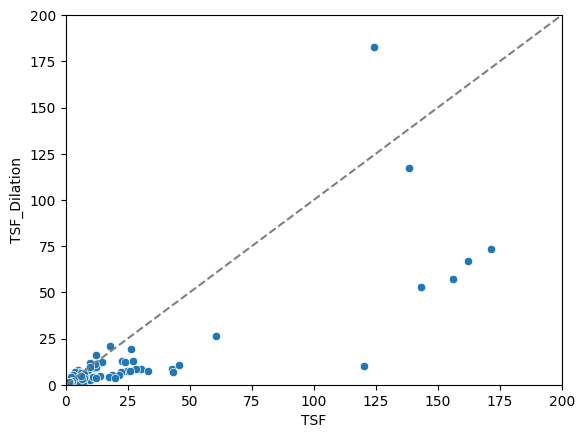

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


benchmark_name = "TSF_DILATION_REAL_UCR_best_params" #anpassen
base_column = 'Fit-Time' #anpassen Accuracy, Fit-Time, Predict-Time, total_feature_count

df = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + ".csv", index_col=0)
df = df.filter(items=['Dataset', 'Classifier', base_column])
df = df.pivot(index='Dataset', columns='Classifier')[base_column]

x_points = [0, 200]
y_points = [0, 200]
plt.plot(x_points, y_points, linestyle='dashed', color="gray")
sns.scatterplot(data = df, x = "TSF", y = "TSF_Dilation")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.savefig("./results/" + benchmark_name + "/" + benchmark_name + "_scatterplot_"+ base_column +".png", bbox_inches="tight")